# Regresión Logística y Descenso de Gradiente

Germán de los Mozos Romero

13/11/2020

El objetivo de esta práctica es calcular el descenso de gradiente para optimizar dicha función. Todo el proceso se realizará con funciones básicas de Python. Para ello, contamos con una base de datos que contiene 100 observaciones con los resultados de dos pruebas y una tercera variable que indica el resultado de las pruebas: 1 para los aprobados y 0 para los suspensos.

### Librerías

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [81]:
data = pd.read_csv("../data/4_1_data.csv")
data.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [82]:
data.tail()

,score-1,score-2,label
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
score-1    100 non-null float64
score-2    100 non-null float64
label      100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


### Visualización previa

In [84]:
# Seleccionamos los valores de las columnas de score-1 y score-2 y generamos una lista llamada scoresT
scoresT = data[['score-1', 'score-2']].values
# Mismo procedimiento para la columna de label. En este caso lo asignamos a resultsT
resultsT = data['label'].values

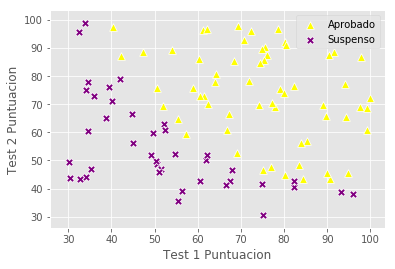

In [85]:
aprobado = (resultsT == 1).reshape(100, 1)# Creamos aprobado cuando resultados es igual a 1, y la lista creada tendrá 100 filas y una columna
suspenso = (resultsT == 0).reshape(100, 1)  # Mismo procedmiento para los suspensos

# Hacemos dos scatterplot sobre ax

ax = sns.scatterplot(x = scores[aprobado[:, 0], 0], # Aprobados test 1
                     y = scores[aprobado[:, 0], 1], #Aprobados test 2
                     marker = "^",
                     color = "yellow",
                     s = 60)
sns.scatterplot(x = scores[suspenso[:, 0], 0], #Suspensos en test 1
                y = scores[suspenso[:, 0], 1],# Suspensos en test 2
                marker = "X",
                color = "purple",
                s = 60)

ax.set(xlabel="Test 1 Puntuacion", ylabel="Test 2 Puntuacion") # Dar nombres a los ejes
ax.legend(["Aprobado", "Suspenso"]) #Para poner la lyenda
plt.show();

### Definir funcion Sigmoide

In [86]:
#Definimos la funcion que nos calcule lo siguiente:
def funcionSigmoide(x):    
    return 1/ (1 + np.exp(-x))

σ(z)=11+e−z
σ(z)=11+e−z

In [87]:
funcionSigmoide(0)

0.5

### Funcion de Coste y Gradiente


El objetivo de la regresión logística es minimizar la función de coste

donde el gradiente de la función de costoe está dado por

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [88]:
# Definimos la funcionCoste
def funcionCoste (theta, x, y):  # Tres parámetros: theta, x e y
    m = len(y)            # objeto m con la longitud de y
    y_pred = funcionSigmoide(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)) 
    coste = -1 / m * sum(error) # Para calcular el coste se suman todas los errores y se divide por m observaciones
    # Se añade un menos al principio para que el coste salga positivo
    gradiente = 1 / m * np.dot(x.transpose(), (y_pred - y)) # el gradiente es la derivada del coste en función de 
    # theta. Lo obtenemos con las transpuesta de x multiplicado por la diferencia de "y predicha" menos "y" real
    
    return coste[0] , gradiente

### Coste y Gradiente inicial

In [89]:
mean_scoresT = np.mean(scores, axis=0)
std_scoresT = np.std(scores, axis=0)
scores = (scoresT - mean_scoresT) / std_scoresT #estandarización de los scores

rows = scores.shape[0] #numero de rows (filas)
cols = scores.shape[1] #numero de cols (columnas)

X = np.append(np.ones((rows, 1)), scores, axis=1) 
y = resultsT.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
coste, gradiente = funcionCoste(theta_init, X, y)  #coste y gradiente iniciales definido por la X, Y y theta inicial


print("Coste de inicializacion", coste)
print("Gradiente de inicializacion", gradiente)

Coste de inicializacion 0.693147180559946
Gradiente de inicializacion [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Gradiente descendiente

Minimizar la función de coste $ J (\ theta) $ actualizando la siguiente ecuación $\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$  y repetir hasta la convergencia

In [90]:
def descensoGradiente(x, y, theta, alpha, iterations):# definimos funcion de gradiente con cinco parámetros
    # alpha es la curva de aprendizaje
    costs = []
    for i in range(iterations):
        coste, gradiente = funcionCoste(theta, x, y) #calcular el coste y el gradietne con la funcionCoste
        theta -= (alpha * gradiente) # a theta le vamos restando la multiplicación del gradiente por el alpha
        costs.append(coste) # vamos añadiendo al array costes, los resultados de las iteraciones
    return theta, costs

In [94]:
theta, costs = descensoGradiente(X, y, theta_init, 1, 900)

In [95]:
# Mostramos
print("Theta después de correr el descenso de gradiente:", theta)
print("Resutado coste:", costs[-1])

Theta después de correr el descenso de gradiente: [[1.71844016]
 [3.99276769]
 [3.72511723]]
Resutado coste: 0.2034977016012488


### Graficar la convergencia de J

Graficar $ J (\ theta) $ contra el número de iteraciones de descenso de gradiente:

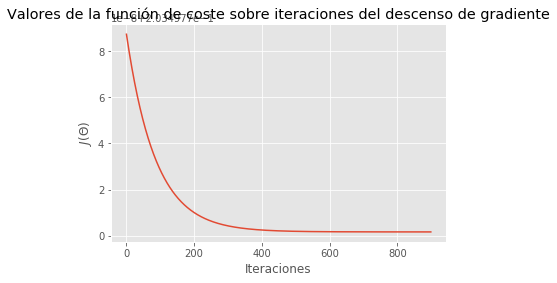

In [96]:
plt.plot(costs) # graficamos costes
plt.xlabel("Iteraciones") #dependiendo de las iteraciones calculadas
plt.ylabel("$J(\Theta)$")
plt.title("Valores de la función de coste sobre iteraciones del descenso de gradiente");

### Referencias

https://github.com/lmntrixsid/Linear-and-Logistic-Regression-with-NumPy-and-Python/blob/master/Logistic_Regression_Completed.ipynb